In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import *
sys.path.append('/data/nihaifeng/code/HeliosArtifact/simulator')
import utils

sns.set_style("ticks")
font = {
	"family": "Roboto",
}
plt.rc("font", **font) 
sns.set_style(font)
paper_rc = {
	"lines.linewidth": 2.5,
	"lines.markersize": 10,
}
sns.set_context("paper", font_scale=1.6, rc=paper_rc)
current_palette = sns.color_palette()
pd.set_option("display.max_columns", None)

plt.rcParams.update({
	"legend.fontsize": 16,  # 图例字体大小
	"axes.labelsize": 16,   # 坐标轴标签字体大小
	"xtick.labelsize": 16,  # x 轴刻度字体大小
	"ytick.labelsize": 16,  # y 轴刻度字体大小
	"font.size": 18         # 图表默认字体大小（一般用于文本）
})

In [58]:
print(current_palette)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]


In [12]:
data_name = ['PAI', 'Philly', 'Venus']
xticks = [[0, 10, 20, 30 , 40], [0, 15, 30, 45, 60],  [0, 5, 10, 15, 20, 26]]
schedulers = ["fifo_consolidate", "fifo_FGD", "fifo_stBestFit", "gandiva_clustering", "gandiva_stBestFit", "defragS_stBestFit"] # 
# labels = ['BestFit', 'FGD', "St-BestFit", 'Gandiva', 'DeFragS']
labels = ['BF', 'FGD', "STBF", 'Gandiva', 'St-Gandiva', 'DeFragS']
log_dir = '../log/new'
colors = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 
		  (1.0, 0.4980392156862745, 0.054901960784313725),
		  (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
		  (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
		 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
		  (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
		  ]

window_size = 60 * 24
data_type = 'fragmentation_ratio' #  gpu_utilization 


linestyles = [":", "--", "-", "-.", ":",  "--"]
ax_number = ['a', 'b', 'c']


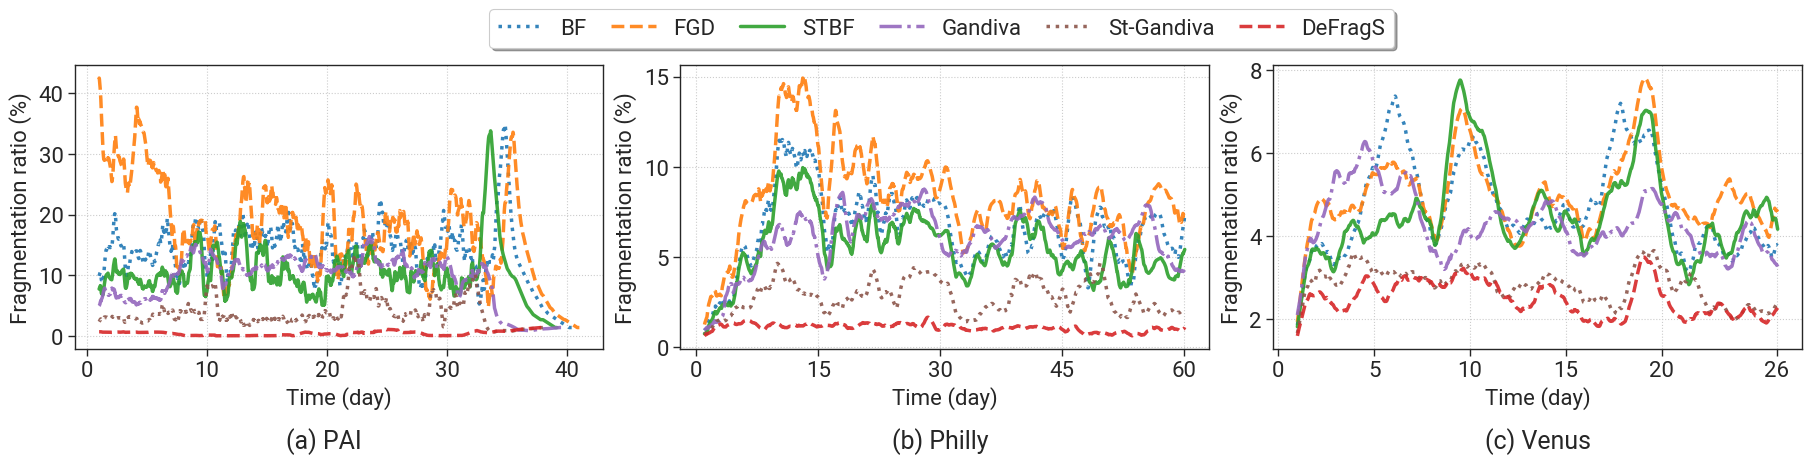

In [14]:
# fragmentation ration & gpu utilization
fig, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(18, 4))

for i, data in enumerate(data_name):
	ax = axes[i]
	for j, scheduler in enumerate(schedulers):
		if data == 'PAI':
			df = pd.read_csv(log_dir+f'/ali20/ali20_{scheduler}/all/{scheduler}_all_seq.csv')
		elif data == 'Philly':
			df = pd.read_csv(log_dir+f'/Philly/Philly_{scheduler}/all/{scheduler}_all_seq.csv')
		elif data == 'Venus':
			df = pd.read_csv(log_dir+f'/Venus_Sept/Venus_Sept_{scheduler}/all/{scheduler}_all_seq.csv')
		y = df[data_type] *100
		y_mean = y.rolling(window=window_size).mean()
		ax.plot(range(len(y_mean)), y_mean, linestyles[j], alpha=0.9, label=labels[j], color=colors[j])
	
	ax.set_xlabel(f"Time (day)")
	ax.set_ylabel(f"Fragmentation ratio (%)")
	# ax.legend(loc="upper left")

	ax.set_xticks([tick * window_size for tick in xticks[i]])
	ax.set_xticklabels(xticks[i])
	ax.grid(linestyle=":")
	ax.text(0.4, -0.35, f"({ax_number[i]}) {data}", transform=ax.transAxes)

handles, _labels = axes[0].get_legend_handles_labels()
fig.legend(handles, _labels, loc="upper center",bbox_to_anchor=(0.52, 1.15),ncol=len(schedulers),columnspacing=1.1, fancybox=True,shadow=True)
save = True
if save:
	fig.savefig(f"../figures/experiment1_fragmenation_ration.pdf", bbox_inches="tight", dpi=600,)

/tmp/ipykernel_510018/2222621846.py:33: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.1)


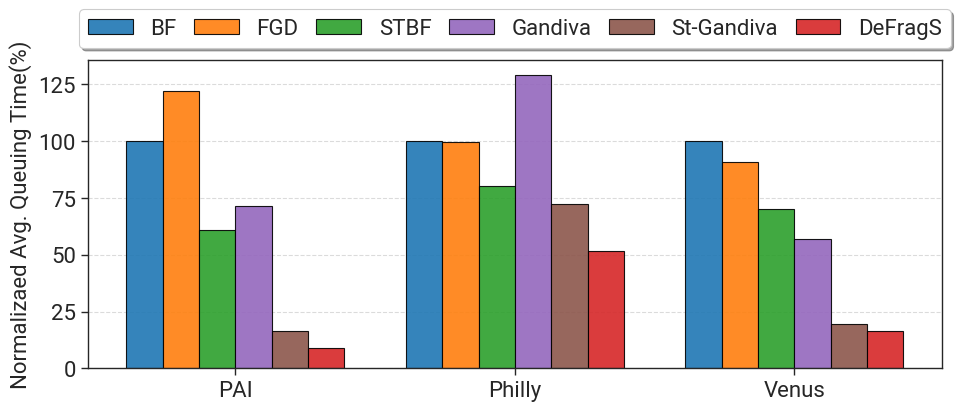

In [77]:
fig, (ax1) = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(9.5, 4))
x = np.arange(len(data_name))
width = 0.13

shcedulers_data = []
improvement_ratios = []
for i, data in enumerate(data_name):
	que_ls = []
	for j, scheduler in enumerate(schedulers):
		if data == 'PAI':
			df = pd.read_csv(log_dir+f'/ali20/ali20_{scheduler}/que_avg.csv')
		elif data == 'Philly':
			df = pd.read_csv(log_dir+f'/Philly/Philly_{scheduler}/que_avg.csv')
		elif data == 'Venus':
			df = pd.read_csv(log_dir+f'/Venus_Sept/Venus_Sept_{scheduler}/que_avg.csv')
		que_ls.append(df.iloc[len(df)-1, 1])

	# Normalize the queuing time
	que_ls = np.array(que_ls) / que_ls[0] * 100
	shcedulers_data.append(que_ls)

# 1. Draw Queue of different schedulers in each VC
scheduler_data = np.array(shcedulers_data).T
for i in range(len(schedulers)):
	ax1.bar(x + width * (i-2.5), scheduler_data[i], width, alpha=0.9,linewidth=0.8,edgecolor="k", label=labels[i], color=colors[i])

ax1.set_xticks(x)
ax1.set_xticklabels(data_name)
ax1.set_ylabel('Normalizaed Avg. Queuing Time(%)')
ax1.legend(loc="upper center",bbox_to_anchor=(0.5, 1.2),ncol=6, columnspacing=0.8, fancybox=True,shadow=True,)
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplots_adjust(wspace=0.1) 
save = True
if save:
	fig.savefig(f"../figures/experiment2_QueuingTime_analysis.pdf", bbox_inches="tight", dpi=600,)

/tmp/ipykernel_610372/790333837.py:33: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.1)


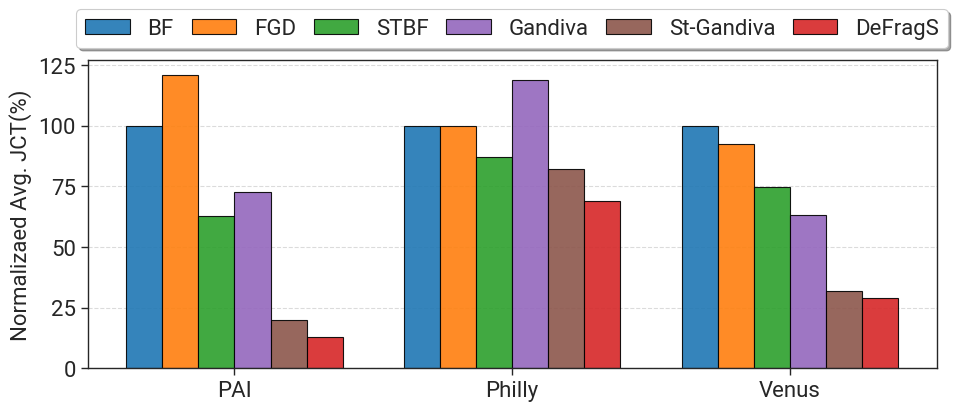

In [10]:
fig, (ax1) = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(9.5, 4))
x = np.arange(len(data_name))
width = 0.13

shcedulers_data = []
improvement_ratios = []
for i, data in enumerate(data_name):
	que_ls = []
	for j, scheduler in enumerate(schedulers):
		if data == 'PAI':
			df = pd.read_csv(log_dir+f'/ali20/ali20_{scheduler}/jct_avg.csv')
		elif data == 'Philly':
			df = pd.read_csv(log_dir+f'/Philly/Philly_{scheduler}/jct_avg.csv')
		elif data == 'Venus':
			df = pd.read_csv(log_dir+f'/Venus_Sept/Venus_Sept_{scheduler}/jct_avg.csv')
		que_ls.append(df.iloc[len(df)-1, 1])

	# Normalize the queuing time
	que_ls = np.array(que_ls) / que_ls[0] * 100
	shcedulers_data.append(que_ls)

# 1. Draw Queue of different schedulers in each VC
scheduler_data = np.array(shcedulers_data).T
for i in range(len(schedulers)):
	ax1.bar(x + width * (i-2.5), scheduler_data[i], width, alpha=0.9,linewidth=0.8,edgecolor="k", label=labels[i], color=colors[i])

ax1.set_xticks(x)
ax1.set_xticklabels(data_name)
ax1.set_ylabel('Normalizaed Avg. JCT(%)')
ax1.legend(loc="upper center",bbox_to_anchor=(0.5, 1.2),ncol=6, columnspacing=0.8, fancybox=True,shadow=True,)
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplots_adjust(wspace=0.1) 
save = False
if save:
	fig.savefig(f"../figures/experiment2_QueuingTime_analysis.pdf", bbox_inches="tight", dpi=600,)

/tmp/ipykernel_610372/697842659.py:45: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.1)


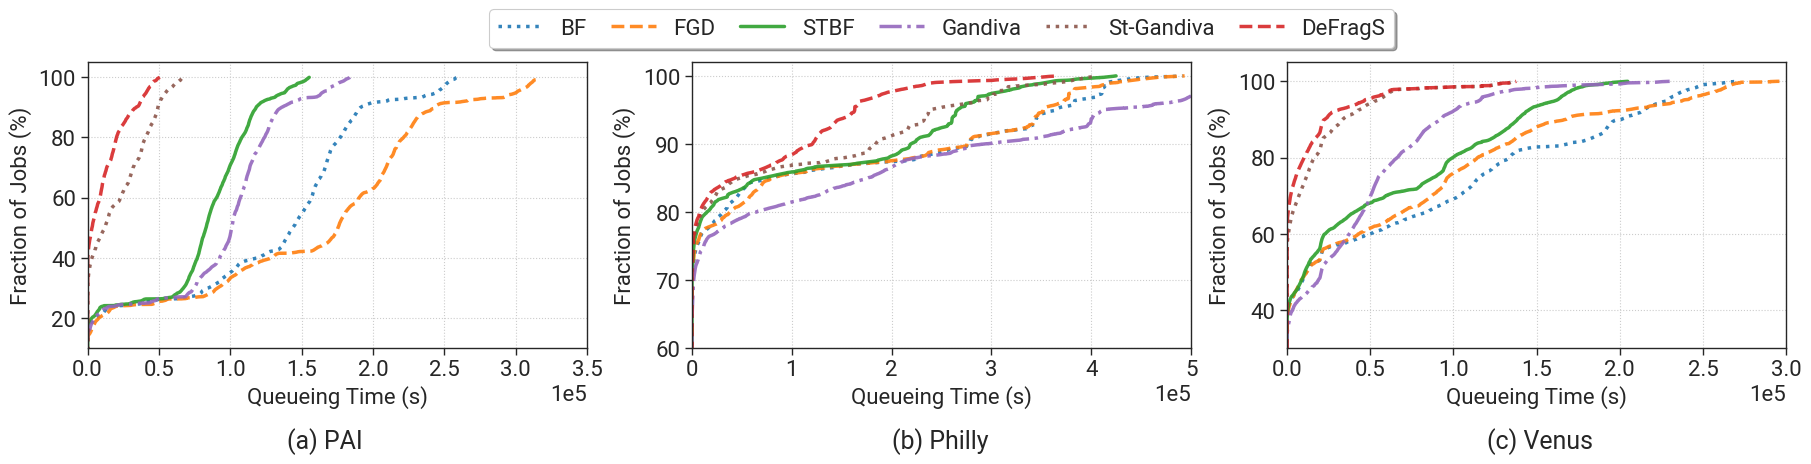

In [15]:
fig, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(18, 4))
x = np.arange(len(data_name))
width = 0.15

dfs = []
for i, data in enumerate(data_name):
	ls = []
	for j, scheduler in enumerate(schedulers):
		if data == 'PAI':
			ls.append(pd.read_csv(log_dir+f'/ali20/ali20_{scheduler}/all/{scheduler}_all_log.csv'))
		elif data == 'Philly':
			ls.append(pd.read_csv(log_dir+f'/Philly/Philly_{scheduler}/all/{scheduler}_all_log.csv'))
		elif data == 'Venus':
			ls.append(pd.read_csv(log_dir+f'/Venus_Sept/Venus_Sept_{scheduler}/all/{scheduler}_all_log.csv'))
	dfs.append(ls)

for i, vc in enumerate(data_name):
# 2. Draw Queue CDF of Venus
	for idx, scheduler in enumerate(schedulers):
		y = dfs[i][idx]['queue']
		sorted_y = np.sort(y)
		sorted_y = sorted_y[:int(len(sorted_y)*0.99)]    
		cdf = np.arange(1, len(sorted_y) + 1) / len(sorted_y) * 100
		axes[i].plot(sorted_y, cdf, linestyles[idx], alpha=0.9, label=labels[idx], color=colors[idx])
		

for i in range(len(axes)): 
	axes[i].set_xlabel("Queueing Time (s)")
	axes[i].set_ylabel("Fraction of Jobs (%)")
	if i ==0:
		axes[i].set_ylim(10, 105)
		axes[i].set_xlim(0, 350000)
	elif i ==1:
		axes[i].set_ylim(60, 102)
		axes[i].set_xlim(0, 500000)
	elif i ==2:
		axes[i].set_ylim(30, 105)
		axes[i].set_xlim(0, 300000)
	axes[i].ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
	#axes[i].legend(loc="lower right")
	axes[i].grid(linestyle=":")

	axes[i].text(0.4, -0.35, f"({ax_number[i]}) {data_name[i]}", transform=axes[i].transAxes)

plt.subplots_adjust(wspace=0.1) 

handles, _labels = axes[0].get_legend_handles_labels()
fig.legend(handles, _labels, loc="upper center",bbox_to_anchor=(0.52, 1.15),ncol=6, columnspacing=1.1, fancybox=True,shadow=True,)

save = True
if save:
	fig.savefig(f"../figures/experiment2_QueuingTime_cdf.pdf", bbox_inches="tight", dpi=600,)

[10681, 10704, 10673, 10693, 10709, 10676, 10671, 10689, 10714, 10698, 10664]


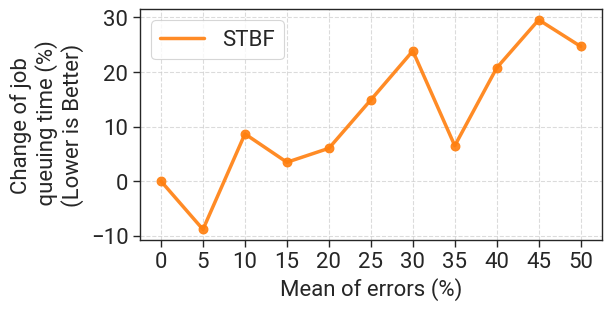

In [ ]:
# 续实验4：鲁棒性，duration不可只知 画queuing time
scheduler = 'fifo_stBestFit'
data = 'ali20' # ali20, Philly, Venus_Sept
fig, (ax1) = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(6, 3), gridspec_kw={'hspace': 0.09})

labels = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
log_dirs = ["../log/new","../log/noDuration_05","../log/noDuration_1", "../log/noDuration_15","../log/noDuration_20",
			"../log/noDuration_25", "../log/noDuration_3", "../log/noDuration_35", "../log/noDuration_40", "../log/noDuration_45","../log/noDuration_5"]
colos_ = [(1.0, 0.4980392156862745, 0.054901960784313725),(0.17254901960784313, 0.6274509803921569, 0.17254901960784313), ]
_que_ls = []
for j in range(len(log_dirs)):
	df = pd.read_csv(log_dirs[j]+f'/{data}/{data}_{scheduler}/que_avg.csv')
	_que_ls.append(df.iloc[len(df)-1, 1])
base = _que_ls[0]
que_ls = (np.array(_que_ls) - base) / base * 100
ax1.plot(labels, que_ls, alpha=0.9, color=colos_[0], label="STBF")
ax1.scatter(labels, que_ls, alpha=0.9, color=colos_[0], marker='o', s=40)

scheduler = "defragS_stBestFit"
_que_ls = []
for j in range(len(log_dirs)):
	df = pd.read_csv(log_dirs[j]+f'/{data}/{data}_{scheduler}/que_avg.csv')
	_que_ls.append(df.iloc[len(df)-1, 1])

print(_que_ls)
# Normalize the queuing time base DefragS
base = _que_ls[0]
que_ls = (np.array(_que_ls) - base) / base * 100
# ax1.plot(labels, que_ls, alpha=0.9, color=colos_[1], label='DeFragS')
# ax1.scatter(labels, que_ls, alpha=0.9, color=colos_[1], marker='o', s=40)


ax1.legend(loc="upper left")
ax1.set_xlabel('Mean of errors (%)')
ax1.set_xticks(labels) 
ax1.set_ylabel('Change of job queuing\n time (%) (Lower is Better)')
ax1.grid(True, linestyle='--', alpha=0.7)

save = True
if save:  
	fig.savefig(f"../figures/noDuration_NormalizedChange.pdf", bbox_inches="tight", dpi=600,)

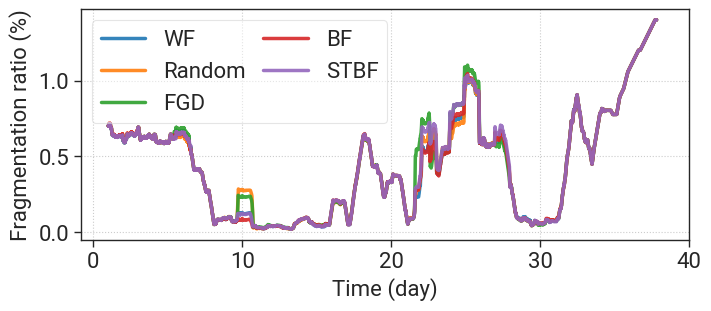

In [19]:
data_name = 'ali20'
fig, (ax1) = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(7, 3), gridspec_kw={'hspace': 0.09})
xticks = [0, 10, 20, 30, 40]
schedulers = ["defragS_worstFit","defragS_random", "defragS_FGD", "defragS_consolidate", "defragS_stBestFit", ]
labels = ["WF", "Random", 'FGD', "BF", 'STBF',  ]
log_dir = '../log/impact_of_palcement_for_DeFragS'

window_size = 60 * 24
data_type = 'fragmentation_ratio'

colors_ = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
		   (1.0, 0.4980392156862745, 0.054901960784313725),
		   (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),]
for j, scheduler in enumerate(schedulers):
	df = pd.read_csv(log_dir+f'/{data_name}/{data_name}_{scheduler}/all/{scheduler}_all_seq.csv')
	y = df[data_type] *100
	y_mean = y.rolling(window=window_size).mean()
	# ax1.plot(range(len(y_mean)), y_mean, linestyles[j], alpha=0.9, label=labels[j], color=colors_[j])
	ax1.plot(range(len(y_mean)), y_mean, alpha=0.9, label=labels[j])

ax1.set_xlabel(f"Time (day)")
ax1.set_ylabel(f"Fragmentation ratio (%)")
ax1.legend(loc="upper left", ncol=2, columnspacing=0.8, framealpha=0.5,)
ax1.set_xticks([tick * window_size for tick in xticks])
ax1.set_xticklabels(xticks)
ax1.grid(linestyle=":")

save = True
if save:
	fig.savefig(f"../figures/experiment5_frag.pdf", bbox_inches="tight", dpi=600,)

[10669, 10700, 10693, 10661, 10673]
[154338, 131255, 100437, 74639, 75810]


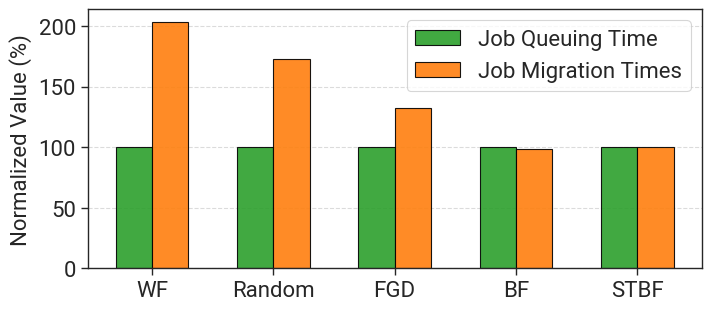

In [5]:
fig, (ax2) = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(7, 3), gridspec_kw={'hspace': 0.09})
datas = []
que_ls = []
for j, scheduler in enumerate(schedulers):
	df = pd.read_csv(log_dir+f'/{data_name}/{data_name}_{scheduler}/que_avg.csv')
	que_ls.append(df.iloc[len(df)-1, 1])
print(que_ls)
que_ls = np.array(que_ls) / que_ls[-1] * 100
datas.append(que_ls)

cnts = []
for j, scheduler in enumerate(schedulers):
	with open(log_dir+f'/{data_name}/nohup/{data_name}_{scheduler}.out', "r") as file:
		content = file.read()
		cnts.append(content.count('Migration') + content.count('Swap'))
print(cnts)
cnts = np.array(cnts) / cnts[-1] * 100
datas.append(cnts)

x = np.arange(len(schedulers))
width=0.3
colos_ = [(0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (1.0, 0.4980392156862745, 0.054901960784313725),]
# colos_ = ["#72b7a1", "#e99675"]
_labels= ['Job Queuing Time', 'Job Migration Times']
datas = np.array(datas)
for i in range(len(datas)):
	ax2.bar(x + width * (i-0.5), datas[i], width, alpha=0.9,linewidth=0.8,edgecolor="k", label=_labels[i], color=colos_[i])

ax2.set_ylabel('Normalized Value (%)')
ax2.set_xticks(x)
# ax2.set_xticklabels(labels = ['DeFragS\n-FGD', "DeFragS\n-BestFit", 'DeFragS\n-St-BestFit', ])
ax2.set_xticklabels(labels =labels)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)
ax2.legend(loc="upper right")
# ax2.set_ylim(80, 135)
# ax2.set_yticks([80, 90, 100, 110, 120, 130])

save = True
if save:
	fig.savefig(f"../figures/experiment5_performance.pdf", bbox_inches="tight", dpi=600,)